In [71]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
warnings.filterwarnings("ignore")

DATA_FILE = 'Sample - Superstore.xls'

### Import Data

In [72]:
df = pd.read_excel('./data/' + DATA_FILE)

In [73]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [74]:
'''
See the available dat ranges for each category
'''
def cat_time_ranges(cat):
    print('Category:', cat)
    tmp_df = df.loc[df['Category'] == cat]
    print(tmp_df['Order Date'].min(), ' to ',  tmp_df['Order Date'].max())
    print(tmp_df['Order Date'].min() - tmp_df['Order Date'].max())
    print('\n')

for cat in list(df.Category.unique()):
    cat_time_ranges(cat)


Category: Furniture
2014-01-06 00:00:00  to  2017-12-30 00:00:00
-1454 days +00:00:00


Category: Office Supplies
2014-01-03 00:00:00  to  2017-12-30 00:00:00
-1457 days +00:00:00


Category: Technology
2014-01-06 00:00:00  to  2017-12-30 00:00:00
-1454 days +00:00:00




In [75]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [76]:
furniture = df.loc[df['Category'] == 'Furniture']

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 
        'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True) # Drop useless cols
furniture = furniture.sort_values('Order Date') # Order by date

In [77]:
furniture

,Order Date,Sales
7474,2014-01-06,2573.8200
7660,2014-01-07,76.7280
866,2014-01-10,51.9400
716,2014-01-11,9.9400
2978,2014-01-13,545.9400
4938,2014-01-13,333.9990
6474,2014-01-14,61.9600
970,2014-01-16,127.1040
5465,2014-01-19,181.4700
6327,2014-01-20,272.9400


In [78]:
# furniture.isnull().sum() # See null values

furniture = furniture.set_index('Order Date') # Use date as index



In [79]:
furniture.head(2)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728


In [80]:
y = furniture['Sales'].resample('MS').mean()

In [88]:
y['2017':] # get average of each month 

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

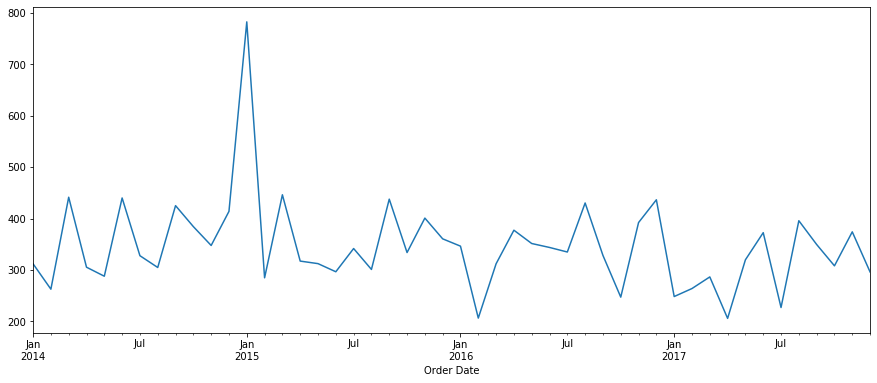

In [84]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. <br>
The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. <br>
There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to <br>decompose our time series into three distinct components: **trend, seasonality, and noise.**

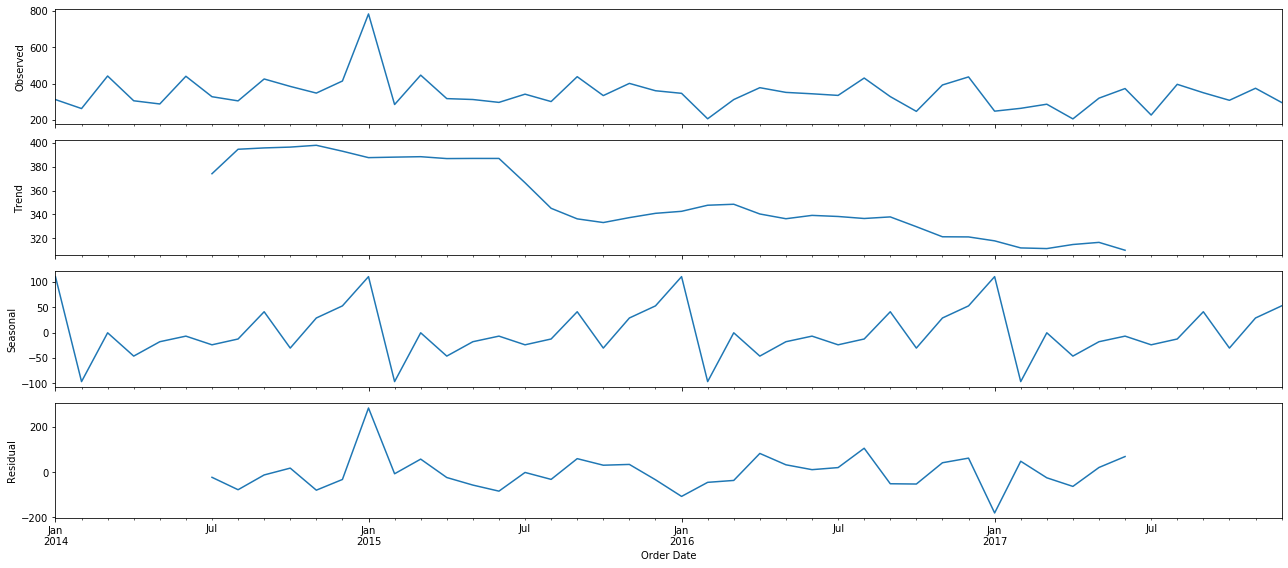

In [89]:

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()




# Time series forecasting with ARIMA

ARIMA - which stands for Autoregressive Integrated Moving Average. <br>
ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:


In [142]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

aics = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aics.append(results.aic)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1447.3867340897314
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.20464898591723
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1317.657637683108
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666282
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3179.1590875170373
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364603
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.19190297478383
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2580.6590859682783
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662502263
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.6389269668506
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1368.3702584714238
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.35521367347195
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1745.512616119359
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476944
AR

In [145]:
min(aics)

263.9371084381269

You are looking for the lowest AIC values, which is 263.93 in this case. <br>
Therefore these parameters are the most optimal: **ARIMA(1, 1, 1)x(1, 1, 0, 12)**

In [151]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0160      0.261     -0.061      0.951      -0.527       0.496
ma.L1         -0.9941      2.606     -0.382      0.703      -6.101       4.113
ar.S.L12      -0.4843      0.079     -6.114      0.000      -0.640      -0.329
sigma2      1.252e+04   3.08e+04      0.406      0.685   -4.79e+04     7.3e+04


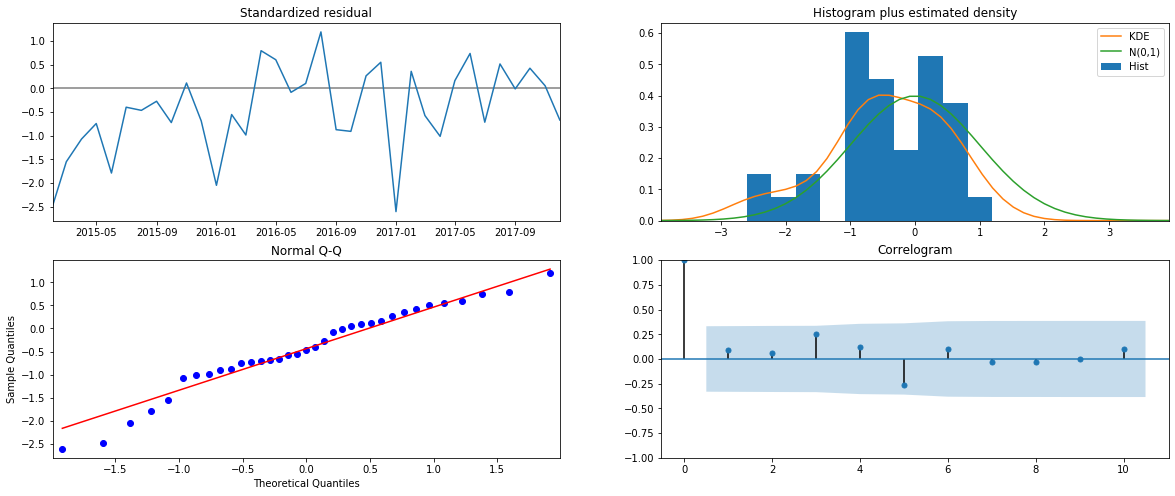

In [152]:
results.plot_diagnostics(figsize=(20, 8))
plt.show()

# Validation
#### To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series,<br> and we set forecasts to start at 2017–01–01 to the end of the data.

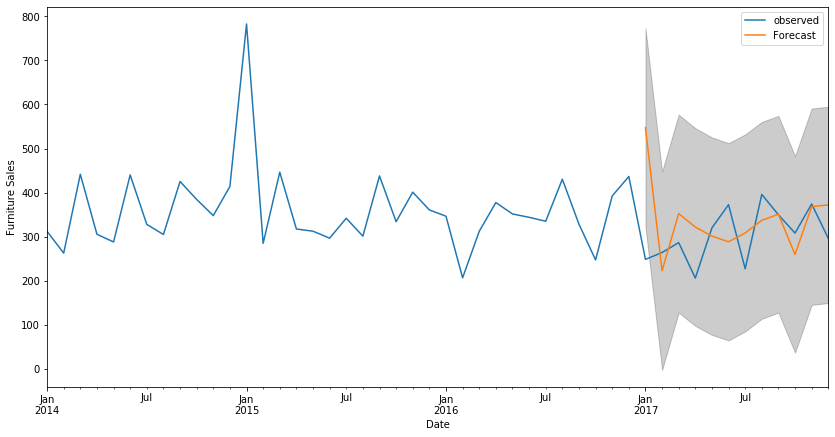

In [153]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()